Q1

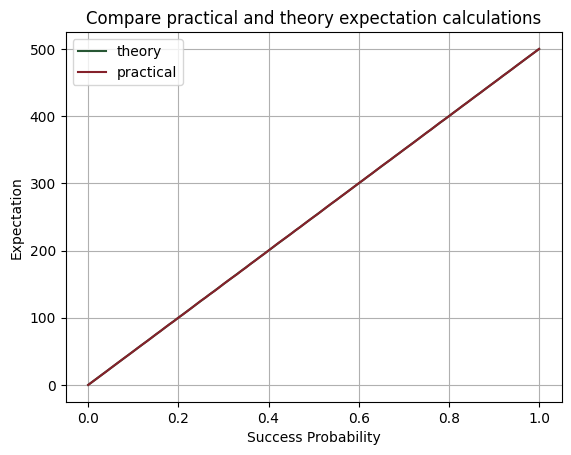

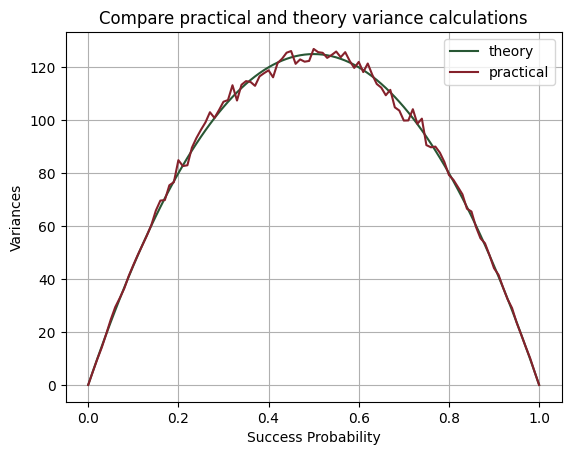

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1


def build_binomial_sample(bernoulli_trials_count, binomial_trials_count, success_probability):
    samples_count = bernoulli_trials_count * binomial_trials_count
    results = [0, 1]

    all_samples = np.random.choice(results, samples_count, p=[
                                   1-success_probability, success_probability])
    samples_array = np.array(all_samples).reshape(
        binomial_trials_count, bernoulli_trials_count)
    binomial_variables = np.sum(samples_array, axis=1)
    return binomial_variables

# Part 2


def calculate_theory_variance(success_prob, bernoulli_trials_count):
    p = success_prob
    n = bernoulli_trials_count
    return n*p*(1-p)


def calculate_theory_expectation(success_prob, bernoulli_trials_count):
    p = success_prob
    n = bernoulli_trials_count
    return n*p


def calculate_practical_expectation(binomial_samples):
    return np.sum(binomial_samples)/binomial_samples.size


def calculate_practical_variance(binomial_samples):
    return calculate_practical_expectation(np.power(binomial_samples - calculate_practical_expectation(binomial_samples), 2))


# main
# binomial_trials_count = 5000
# bernoulli_trials_count = 500
# success_probability = 0.02
# bin_samples = build_binomial_sample(
#     bernoulli_trials_count, binomial_trials_count, success_probability)
# print(bin_samples,'\n\n',
#       calculate_practical_expectation(bin_samples),
# calculate_theory_expectation(success_probability, bernoulli_trials_count),
# calculate_practical_variance(bin_samples),
# calculate_theory_variance(success_probability, bernoulli_trials_count))

binomial_trials_count = 5000
bernoulli_trials_count = 500
success_probabilities = np.arange(0, 1+0.01, 0.01)
bin_samples = np.array([build_binomial_sample(
    bernoulli_trials_count, binomial_trials_count, prob) for prob in success_probabilities])

practical_expectations = np.array(
    [calculate_practical_expectation(bin_sample) for bin_sample in bin_samples])
theory_expectations = np.array([calculate_theory_expectation(
    prob, bernoulli_trials_count) for prob in success_probabilities])
practical_variances = np.array(
    [calculate_practical_variance(bin_sample) for bin_sample in bin_samples])
theory_variances = np.array([calculate_theory_variance(
    prob, bernoulli_trials_count) for prob in success_probabilities])

# print('List of practical expectations: \n', practical_expectations)
# print()
# print('List of theory expectations: \n', theory_expectations)

# print('List of practical variances: \n',practical_variances)
# print()
# print('List of theory variances: \n',theory_variances)


# Part 3
fig1, ax1 = plt.subplots()
ax1.plot(success_probabilities, theory_expectations,
         color='#285734', label="theory")
ax1.plot(success_probabilities, practical_expectations,
         color='#85212b', label="practical")
ax1.set(xlabel='Success Probability', ylabel='Expectation',
        title='Compare practical and theory expectation calculations')
ax1.grid()
ax1.legend()
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(success_probabilities, theory_variances,
         color='#285734', label="theory")
ax2.plot(success_probabilities, practical_variances,
         color='#85212b', label="practical")
ax2.set(xlabel='Success Probability', ylabel='Variances',
        title='Compare practical and theory variance calculations')
ax2.grid()
ax2.legend()
plt.show()



Q2

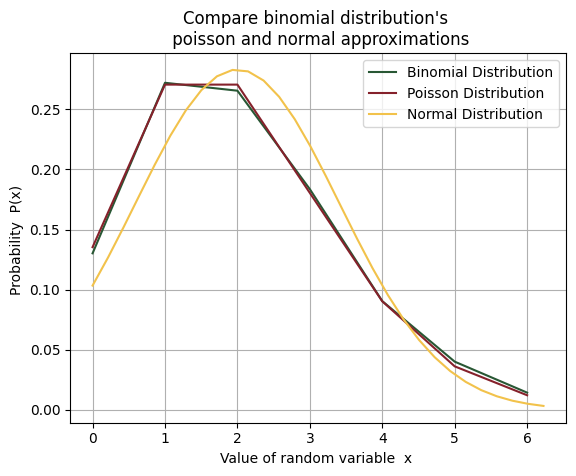

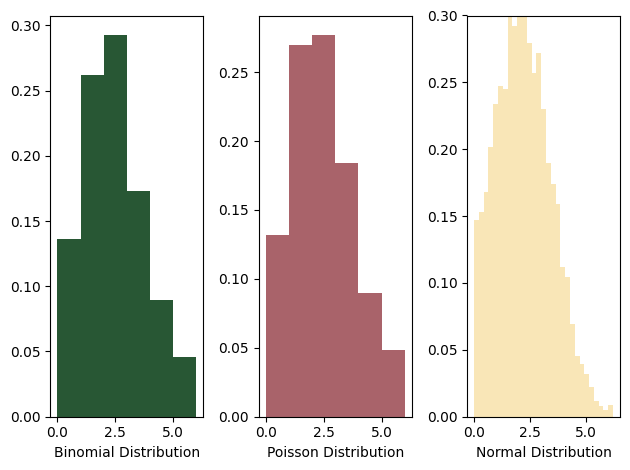

In [2]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt

Probability = 0.008
Num_of_bernollies = 250
poisson_mu = Probability * Num_of_bernollies
normal_mean = Probability * Num_of_bernollies
normal_standard_deviation = np.sqrt(
    Probability * (1-Probability) * Num_of_bernollies)

# samples_count = 30
# samples_count = 50
# samples_count = 500
samples_count = 5000
# samples_count = 50000
# samples_count = 500000
# samples_count = 5000000



discrete_test_values = np.arange(
   0 , Probability * Num_of_bernollies + 3*normal_standard_deviation)
continuous_test_values = np.linspace(
    0, Probability * Num_of_bernollies + 3*normal_standard_deviation, 30)

def calculate_prob_of_binomial_x(x, binom_sample):

    return sum(binom_sample == x)/samples_count

binom_sample = np.random.binomial(
    Num_of_bernollies, Probability, samples_count)
binomial_probs = np.array([calculate_prob_of_binomial_x(t, binom_sample)
                          for t in discrete_test_values])

fig, ax = plt.subplots()
ax.plot(discrete_test_values, binomial_probs,
        color='#285734', label="Binomial Distribution")
ax.plot(discrete_test_values, poisson.pmf(discrete_test_values, poisson_mu),
        color='#85212b', label='Poisson Distribution')
ax.plot(continuous_test_values, norm.pdf(continuous_test_values, normal_mean, normal_standard_deviation),
        color='#f2c24b', label='Normal Distribution')

ax.set(xlabel='Value of random variable  x ', ylabel='Probability  P(x) ',
       title="Compare binomial distribution's \n poisson and normal approximations")
ax.grid()
ax.legend()

# we can also draw histograms
fig, ax = plt.subplots(1, 3)
ax[0].hist(np.random.binomial(Num_of_bernollies, Probability,
           samples_count), discrete_test_values, density=True, color='#285734')
ax[1].hist(np.random.poisson(poisson_mu, samples_count),
           discrete_test_values, alpha=0.7, density=True, color='#85212b')
ax[2].hist(np.random.normal(normal_mean, normal_standard_deviation,
           samples_count), continuous_test_values, alpha=0.4, density=True, color='#f2c24b')
ax[0].set(xlabel="Binomial Distribution")
ax[1].set(xlabel='Poisson Distribution')
ax[2].set(xlabel='Normal Distribution')
plt.ylim(0,0.3)
fig.tight_layout()
plt.show()


Q3

best_students_min_score_theory:  95.3786187865352
scores_beween_second_and_third_square_theory:  80.0  to  88.09387700235298
between_80_and_90_theory:  0.29767161903635686

best_students_min_score_practical:  95.38800256032877
scores_beween_second_and_third_square_practical:  80.00447159845848  to  88.0963259243436
between_80_and_90_practical:  0.29773879999999997


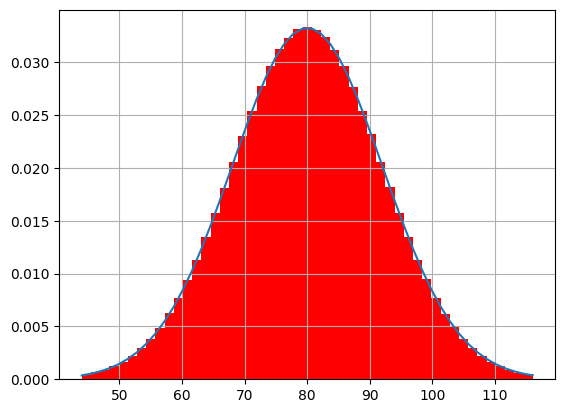

In [3]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt

normal_mean = 80
normal_standard_deviation = 12
samples_count = 5000000

# F(x) = 0.9 => x = ppf(0.9)
# theory
normal_distribution = norm(normal_mean, normal_standard_deviation)

best_students_min_score_theory = normal_distribution.ppf(0.9)
max_score_in_second_square_theory = normal_distribution.ppf(0.5)
max_score_in_third_square_theory = normal_distribution.ppf(0.75)
less_than_80_prob_theory = normal_distribution.cdf(80)
less_than_90_prob_theory = normal_distribution.cdf(90)
between_80_and_90_theory = less_than_90_prob_theory - less_than_80_prob_theory

print("best_students_min_score_theory: ",best_students_min_score_theory)
print("scores_beween_second_and_third_square_theory: ",max_score_in_second_square_theory, " to ", max_score_in_third_square_theory)
print("between_80_and_90_theory: ",between_80_and_90_theory)
print()

# practical
test_values = np.random.normal(loc = normal_mean, scale=normal_standard_deviation, size = samples_count)
best_students_min_score_practical = np.percentile(test_values, 90)
max_score_in_second_square_practical = np.percentile(test_values, 50)
max_score_in_third_square_practical = np.percentile(test_values, 75)

# Calculate the CDF
sorted_values = np.sort(test_values)
n = len(sorted_values)
cdf = np.arange(n + 1) / n
less_than_80_prob_practical = cdf[np.searchsorted(sorted_values, 80, side='right')] 
less_than_90_prob_practical = cdf[np.searchsorted(sorted_values, 90, side= 'right')] 
between_80_and_90_practical = less_than_90_prob_practical - less_than_80_prob_practical
print("best_students_min_score_practical: ",best_students_min_score_practical)
print("scores_beween_second_and_third_square_practical: ",max_score_in_second_square_practical, " to ", max_score_in_third_square_practical)
print("between_80_and_90_practical: ", between_80_and_90_practical)


# we can draw plot
fig, ax = plt.subplots()
test_values = np.linspace(normal_mean-3*normal_standard_deviation,normal_mean+3*normal_standard_deviation)
ax.plot(test_values, normal_distribution.pdf(test_values))
ax.grid()
# or histogram
ax.hist(np.random.normal(normal_mean,normal_standard_deviation,samples_count), test_values, density = True, color='red')
plt.show()

Q3 bonus

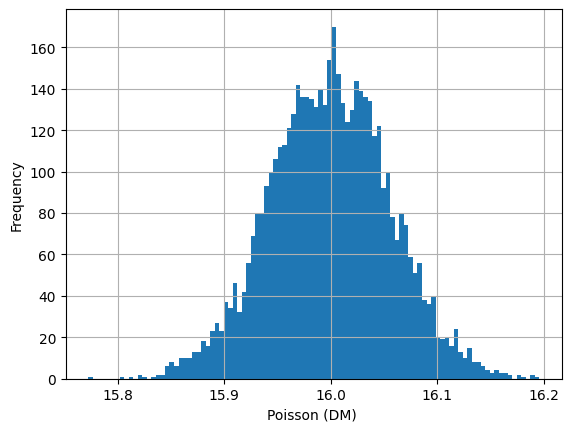

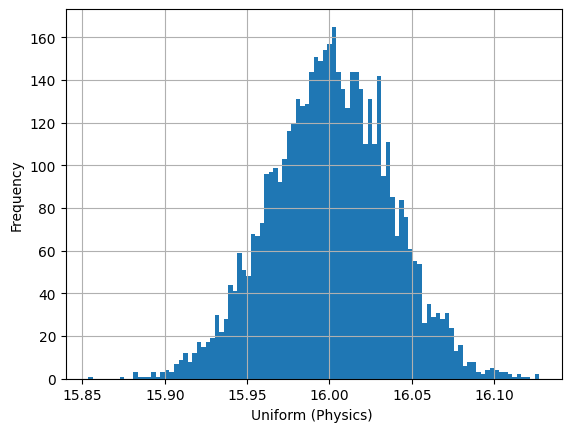

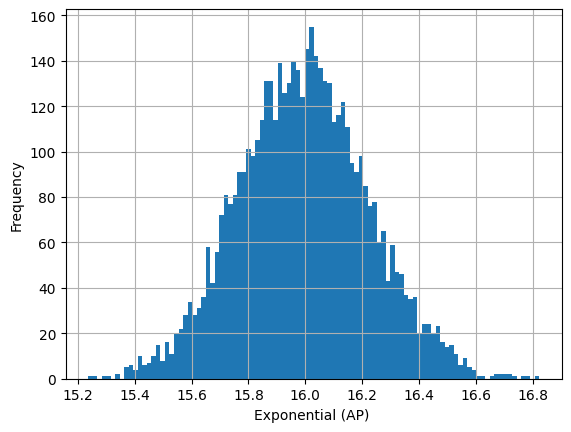

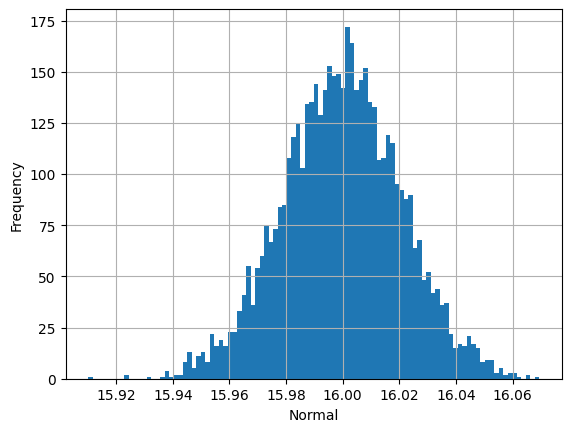

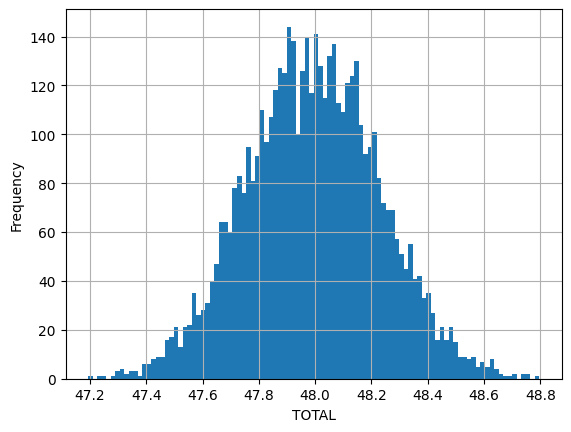

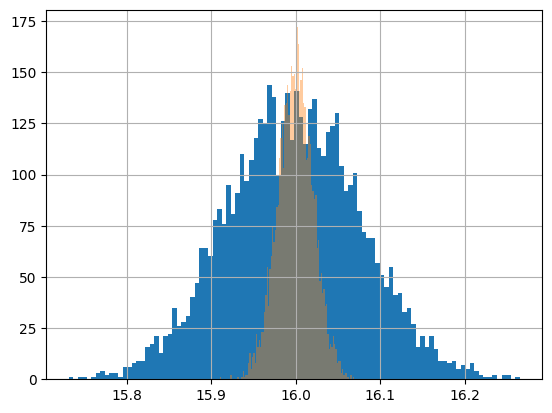

In [4]:
import numpy as np
import matplotlib.pyplot as plt

samples_count = 5000
means_count = 5000
scores_mean = 16
scores_standard_deviation = 1.5 #scores between 16-4.5 and 16+4.5

# DM
fig, ax1 = plt.subplots()
means_sample_poisson = np.array([sum(np.random.poisson(
    lam=scores_mean, size=samples_count))/samples_count for i in range(means_count)])
plt.hist(means_sample_poisson, bins=100)
ax1.set(xlabel="Poisson (DM) ", ylabel="Frequency")
ax1.grid()

# Physics
fig, ax2 = plt.subplots()
means_sample_uniform = np.array([sum(np.random.uniform(
    low=scores_mean-3*scores_standard_deviation, high=scores_mean+3*scores_standard_deviation, size=samples_count))/samples_count for i in range(means_count)])
plt.hist(means_sample_uniform, bins=100)
ax2.set(xlabel="Uniform (Physics) ", ylabel="Frequency")
ax2.grid()

# AP
fig, ax3 = plt.subplots()
means_sample_exp = np.array([sum(np.random.exponential(
    scale=scores_mean, size=samples_count))/samples_count for i in range(means_count)])
plt.hist(means_sample_exp, bins=100)
ax3.set(xlabel="Exponential (AP) ", ylabel="Frequency")
ax3.grid()


fig, ax4 = plt.subplots()
means_sample_normal = np.array([sum(np.random.normal(
    loc=scores_mean, scale=scores_standard_deviation, size=samples_count))/samples_count for i in range(means_count)])
plt.hist(means_sample_normal, bins=100)
ax4.set(xlabel="Normal", ylabel="Frequency")
ax4.grid()



fig, ax5 = plt.subplots()
plt.hist((means_sample_poisson+ means_sample_uniform+means_sample_exp), bins=100)
ax5.set(xlabel="TOTAL", ylabel="Frequency")
ax5.grid()

fig, ax6 = plt.subplots()
plt.hist((means_sample_poisson+ means_sample_uniform+means_sample_exp)/3, bins=100)
plt.hist(means_sample_normal, bins=100, alpha = 0.4)
# plt.hist(means_sample_poisson, bins=500, alpha = 0.8)
# plt.hist(means_sample_uniform, bins=500, alpha = 0.6)
# plt.hist(means_sample_exp, bins=500, alpha= 0.4)
ax6.grid()

plt.show()

Q4

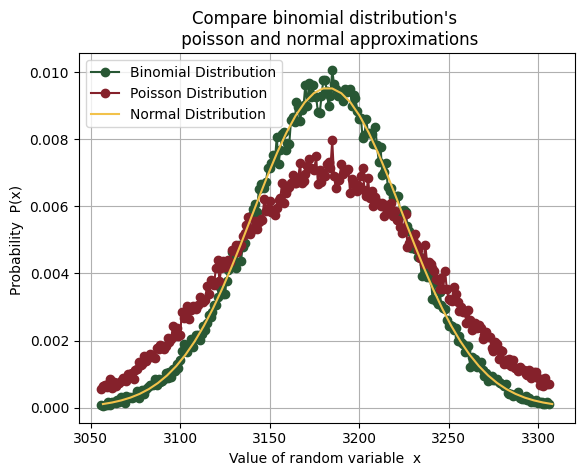

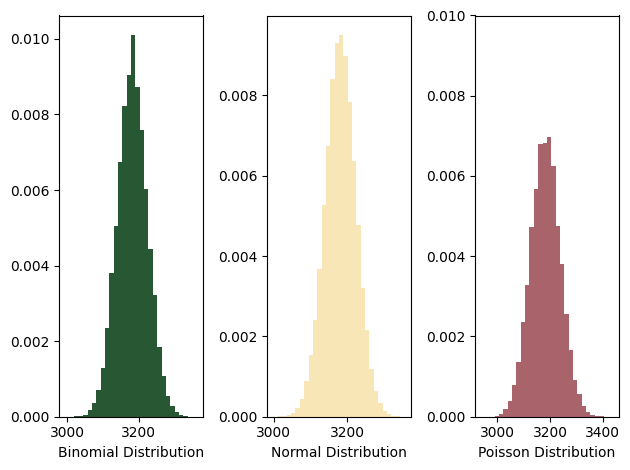

In [5]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt

Probability = 0.45
Num_of_bernollies = 7072
poisson_mu = Probability * Num_of_bernollies
normal_mean = Probability * Num_of_bernollies
normal_standard_deviation = np.sqrt(Probability * (1-Probability) * Num_of_bernollies)

# samples_count = 30
# samples_count = 50
# samples_count = 500
# samples_count = 5000
# samples_count = 100000
samples_count = 100000
# samples_count = 5000000

def calculate_prob_of_binomial_x(x):
    return sum(np.random.binomial(Num_of_bernollies, Probability, samples_count) == x)/samples_count
def calculate_prob_of_poisson_x(x):
    return sum(np.random.poisson(poisson_mu, samples_count) == x)/samples_count

discrete_test_values = np.arange(np.floor(normal_mean-3*normal_standard_deviation), np.floor(normal_mean+3*normal_standard_deviation))
continuous_test_values = np.linspace(normal_mean-3*normal_standard_deviation, normal_mean+3*normal_standard_deviation)

binomial_probs = np.array([calculate_prob_of_binomial_x(t)
                          for t in discrete_test_values])
poisson_probs = np.array([calculate_prob_of_poisson_x(t)
                          for t in discrete_test_values])

fig, ax = plt.subplots()
ax.plot(discrete_test_values, binomial_probs,
        color='#285734', label="Binomial Distribution", marker = 'o')
# ax.plot(discrete_test_values, binom.pmf(discrete_test_values,Num_of_bernollies, Probability),
#         color='#285734',label='Binomial Distribution', marker = 'o')
ax.plot(discrete_test_values, poisson_probs,
        color='#85212b',label='Poisson Distribution', marker = 'o')
# ax.plot(discrete_test_values, poisson.pmf(discrete_test_values, poisson_mu),
#         color='#85212b',label='Poisson Distribution', marker = 'o')
ax.plot(continuous_test_values, norm.pdf(continuous_test_values, normal_mean, normal_standard_deviation),
        color='#f2c24b', label='Normal Distribution')

ax.set(xlabel='Value of random variable  x ', ylabel='Probability  P(x) ',
       title="Compare binomial distribution's \n poisson and normal approximations")
ax.grid()
ax.legend()

# we can also draw histograms
fig, ax = plt.subplots(1, 3)
ax[0].hist(np.random.binomial(Num_of_bernollies, Probability,
           samples_count), density=True, color='#285734', bins= 30)
ax[1].hist(np.random.normal(normal_mean, normal_standard_deviation,
           samples_count), alpha=0.4, density=True, color='#f2c24b', bins= 30)
ax[2].hist(np.random.poisson(poisson_mu, samples_count), alpha=0.7, density=True, color='#85212b', bins= 30)
ax[0].set(xlabel="Binomial Distribution")
ax[1].set(xlabel='Normal Distribution')
ax[2].set(xlabel='Poisson Distribution')
plt.ylim(0,0.01)
fig.tight_layout()
plt.show()
